In [2]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots

#allows currency formatting
import locale
locale.setlocale(locale.LC_ALL, '')

'Spanish_Mexico.1252'

In [7]:
pv = 10000
time_horizon = 30
additions = 10000
#Avge Portafolio Balance placed as constant,as unreal as a setpoint analysis
i = .07

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping = True))
    pv = ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [9]:
# Future value based on market history 
#Using a 9% Expected Return Rate with an 18% volatility
pv = 10000
expected_return = .09
volatility = .18
time_horizon = 30
annual_addition = 10000

print("\tReturn", '\t\t Ending Value'.rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping = True)))
    pf = fv

	Return    		 Ending Value
	0.34               	$23,399.98
	0.2849               	$22,848.76
	-0.1542               	$18,457.90
	0.1809               	$21,809.38
	0.3623               	$23,623.29
	0.0776               	$20,775.99
	-0.016               	$19,840.06
	-0.0148               	$19,852.03
	-0.1542               	$18,458.06
	0.2139               	$22,138.53
	0.1057               	$21,057.04
	-0.0204               	$19,795.93
	0.1031               	$21,030.66
	0.0054               	$20,053.95
	-0.0037               	$19,962.58
	0.005               	$20,049.75
	-0.0423               	$19,576.72
	0.1703               	$21,703.32
	-0.1302               	$18,697.99
	0.1761               	$21,760.71
	-0.0597               	$19,402.89
	0.1449               	$21,448.85
	0.1731               	$21,731.29
	-0.1577               	$18,422.90
	-0.0433               	$19,567.28
	0.15               	$21,499.68
	0.1766               	$21,766.29
	-0.2209               	$17,791.43
	0.2715        

In [17]:
#By running previous cell 5000 times we will obtain a distribution of ending values to make a probability statement 
# about how much we could expect to see at the end.
# 5 Thousand streams of above oucomes 
#Portafolio simulation for ending market values

sim = DataFrame()
iterations = 5000

for x in range(iterations):
    expected_return = .09
    volatility = .18 
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        stream.append(end)
    sim[x]= stream

In [18]:
f5 = list(range(5))
sim[f5]

,0,1,2,3,4
0,22406.83,20728.10,19651.61,20448.08,19893.43
1,20803.08,19262.00,22792.79,18520.91,20919.72
2,21679.79,21497.43,20795.91,21541.69,18957.61
3,18481.17,21157.57,21705.23,21238.61,19812.70
4,19534.90,26625.21,20716.87,22064.28,20190.62
5,19994.26,24157.24,21261.60,21681.31,20976.31
6,20884.61,23015.24,21568.25,22560.55,15941.29
7,22202.41,24415.56,21829.74,19571.25,19721.90
8,18961.43,21883.15,18953.41,21355.24,18856.92
9,25932.52,20941.54,21514.77,18441.46,20642.34


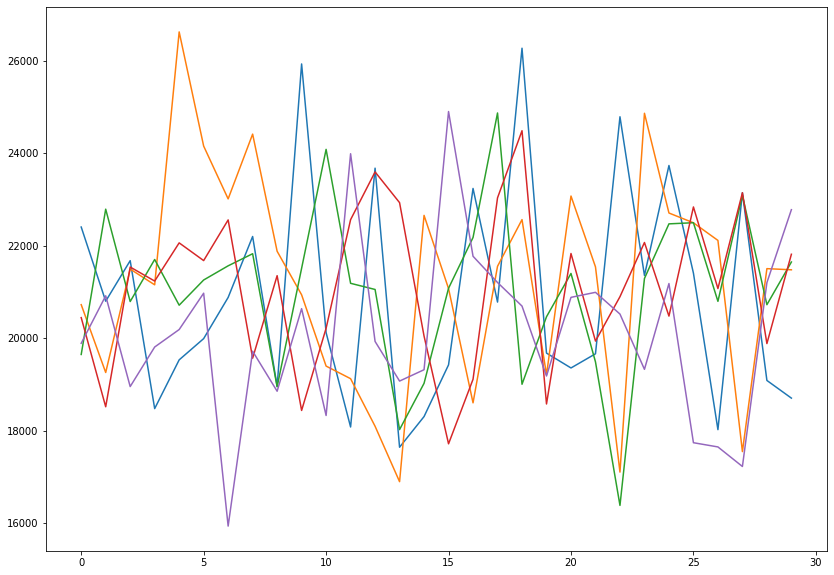

In [25]:
from matplotlib import rcParams
plots.plot(sim[f5])
rcParams['figure.figsize']=14,12

In [26]:
#Summary Statistics
print('Count:', len(sim.loc[29]))
print("Mean:",locale.currency(np.mean(sim.loc[29]),grouping = True))
print("SD:",locale.currency(np.std(sim.loc[29]),grouping = True))
print("Max:",locale.currency(np.max(sim.loc[29]),grouping = True))
print("SD:",locale.currency(np.std(sim.loc[29]),grouping = True))
print("Min:",locale.currency(np.min(sim.loc[29]),grouping = True))

Count: 5000
Mean: $20,842.16
SD: $1,793.63
Max: $27,594.56
SD: $1,793.63
Min: $14,632.54


In [27]:
ending_values = sim.loc[29]
ending_values.describe()

count     5000.000000
mean     20842.163592
std       1793.808306
min      14632.540000
25%      19607.397500
50%      20854.445000
75%      22067.937500
max      27594.560000
Name: 29, dtype: float64

(array([  1.,   0.,   1.,   0.,   3.,   0.,   2.,   3.,   2.,   5.,   2.,
          5.,   7.,   4.,   8.,   9.,  13.,  16.,  15.,  20.,  13.,  13.,
         29.,  30.,  36.,  38.,  36.,  57.,  64.,  59.,  57.,  81.,  83.,
         82.,  90., 117., 104., 103., 128., 102., 108., 132., 147., 127.,
        140., 146., 116., 146., 138., 139., 163., 140., 134., 126., 114.,
        136., 121., 111., 116.,  97.,  92.,  88.,  97.,  78.,  69.,  57.,
         70.,  47.,  40.,  45.,  35.,  42.,  29.,  31.,  20.,  19.,  16.,
         20.,  12.,   5.,  12.,   5.,   7.,  10.,   9.,   2.,   2.,   0.,
          3.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([14632.54  , 14762.1602, 14891.7804, 15021.4006, 15151.0208,
        15280.641 , 15410.2612, 15539.8814, 15669.5016, 15799.1218,
        15928.742 , 16058.3622, 16187.9824, 16317.6026, 16447.2228,
        16576.843 , 16706.4632, 16836.0834, 16965.7036, 17095.3238,
        17224.944 , 17354.5642, 17484.1844, 17

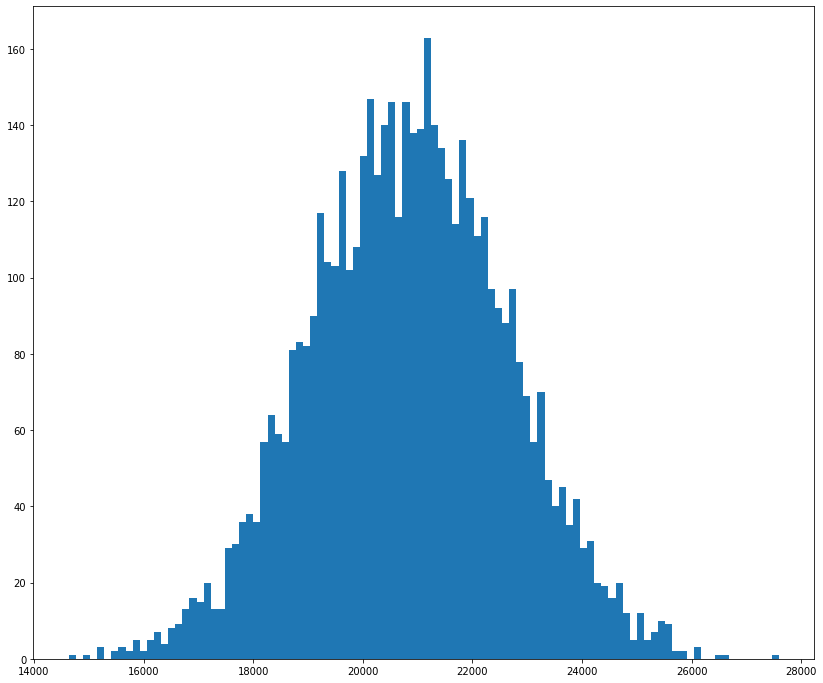

In [28]:
# We would have to use median to learn where the 50% of portafolios would end up being
plots.hist(ending_values, bins=100)

In [31]:
#Probability of having less than a million pesos 1 x 10^6 , by slicing of some values in our table of ending_values
len(ending_values[ending_values < 1000000])#/len(ending_values)

5000

In [35]:
# Percentilse table 

p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90,95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping = True)))

        5%-ile  $17,924.92
       10%-ile  $18,558.46
       15%-ile  $18,975.35
       25%-ile  $19,607.40
       75%-ile  $22,067.94
       85%-ile  $22,710.49
       90%-ile  $23,153.73
       95%-ile  $23,817.76


In [ ]:
#There´s a 95% chance that we will have more than $17,924.92